# COURSE: A deep understanding of deep learning
## SECTION: Overfitting, cross-validation, regularization
### LECTURE: Cross-validation on regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [274]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Create the data and the model

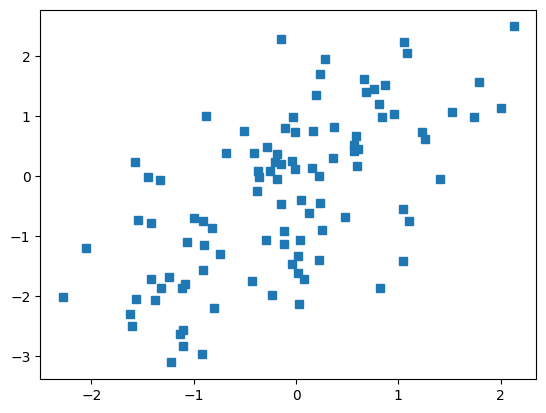

In [275]:
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

# and plot
plt.plot(x,y,'s')
plt.show()

In [276]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

In [277]:
# model meta-parameters

learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

# Select data for training

In [278]:
# select training data (note the hard-coded N!)
# trainPerc = .8
# trainidx  = np.random.choice(range(N),int(N*trainPerc),replace=False) # random indices
# trainBool = np.zeros(N,dtype=bool) # initialize vector of Falses'
# trainBool[trainidx] = True # set selected samples to True

# # show the sizes
# print(x[trainBool].shape)
# print(x[~trainBool].shape)

In [279]:
trainPerc = .8

trainData, testData, trainLabels, testLabels = train_test_split(x, y, train_size=trainPerc)

# show the sizes
print(trainData.shape)
print(testData.shape)
print(trainLabels.shape)
print(testLabels.shape)

trainData = TensorDataset(torch.Tensor(trainData), torch.Tensor(trainLabels))
testData = TensorDataset(torch.Tensor(testData), torch.Tensor(testLabels))

trainLoader = DataLoader(trainData, batch_size=10, shuffle=True)
testLoader = DataLoader(testData, batch_size=10, shuffle=True)

torch.Size([80, 1])
torch.Size([20, 1])
torch.Size([80, 1])
torch.Size([20, 1])


# Train the model

In [280]:
numepochs = 100
losses = torch.zeros(numepochs)
lossesTest = torch.zeros(numepochs)

for epochi in range(numepochs):

  lossesBatch = torch.zeros(len(trainLoader))
  counter = 0

  for X, Y in trainLoader:

    # forward pass
    yHat = ANNreg(X)

    # compute loss
    loss = lossfun(yHat,Y)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    lossesBatch[counter] = loss
    counter += 1

  lossesTestBatch = torch.zeros(len(testLoader))
  counterTest = 0

  for Xtest, Ytest in testLoader:
    yHatTest = ANNreg(Xtest)
    testLoss = lossfun(yHatTest, Ytest)
    lossesTestBatch[counterTest] = testLoss
    counterTest += 1

  lossesTest[epochi] = torch.mean(lossesTestBatch)
  losses[epochi] = torch.mean(lossesBatch)

In [281]:
# report the losses

# compute losses of the TEST set
# predYtest = ANNreg(x[~trainBool])
# testloss = (predYtest-y[~trainBool]).pow(2).mean() # This is the MSE, we could have used the loss function

predYtest = ANNreg(testData.tensors[0])
testloss = lossfun(predYtest, testData.tensors[1])


# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')

Final TRAIN loss: 0.96
Final TEST loss: 1.28


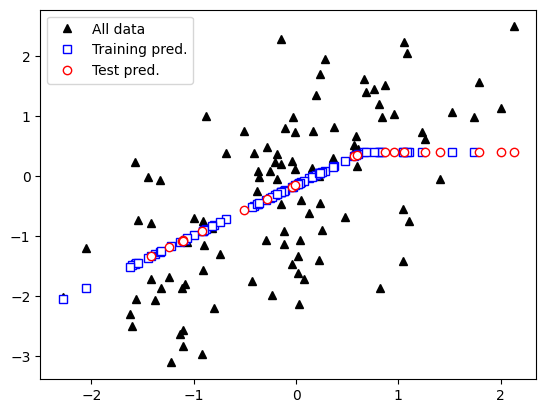

In [282]:
### plot the data

# predictions for final training run
predYtrain = ANNreg(trainData.tensors[0]).detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(trainData.tensors[0], predYtrain,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(testData.tensors[0],predYtest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()

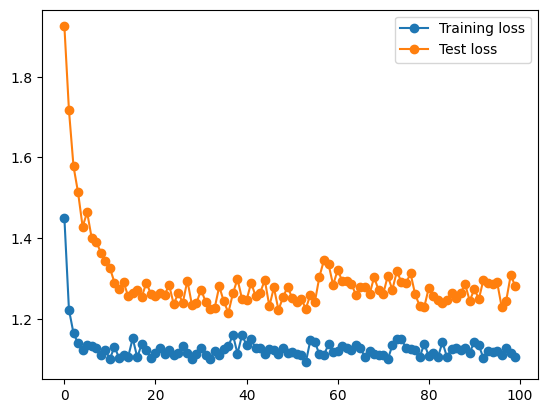

In [283]:
plt.plot(losses.detach().numpy(),'o-', label='Training loss')
plt.plot(lossesTest.detach().numpy(),'o-', label='Test loss')
plt.legend()
plt.show()

# Additional explorations

In [284]:
# 1) The train/test split is currently hard-coded to be 80/20 (note the number "80"). This is bad coding style, because
#    if you change the number of datapoints from N=100 to N=10000, then we're still only training on 80 samples and testing
#    on 10000-80=9920 samples. Change how the variable trainBool is created so that it always trains on 80% of the data,
#    regardless of the dataset size.
# 
#    Done!
# 
# 2) Re-write this code to use scikitlearn and/or DataLoader instead of manually separating the data into train/test.
# 
#    Done!
#
# 3) Do we really need 500 epochs to train the model? To find out, add code to the training loop to compute the MSEloss 
#    for the train and test data on each iteration during training. Then plot the train and test error as a function of
#    training epoch. What is your evaluation of an appropriate amount of training for this model/dataset?
# 
#    We can reduce the number of epochs to 100. The model converges after 100 epochs. Even less, maybe 20
#